<a href="https://colab.research.google.com/github/ndegwaanth/Computer_Vision_Introduction/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

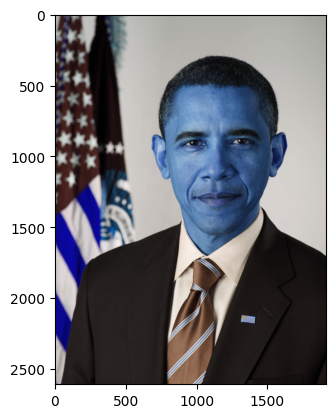

In [2]:
img_path = "/content/data/Official_portrait_of_Barack_Obama.jpg"
img = cv2.imread(img_path)
plt.imshow(img)

In [3]:
img.shape

(2608, 1916, 3)

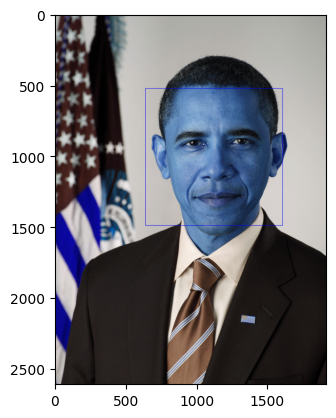

In [17]:
img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)

In [10]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [12]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[637, 524, 966, 966]], dtype=int32)

In [13]:
X, y, width, height = faces[0]

In [15]:
print(f"X-axis: {X}")
print(f"y-axis: {y}")
print(f"Width: {width}")
print(f"Height: {height}")

X-axis: 637
y-axis: 524
Width: 966
Height: 966


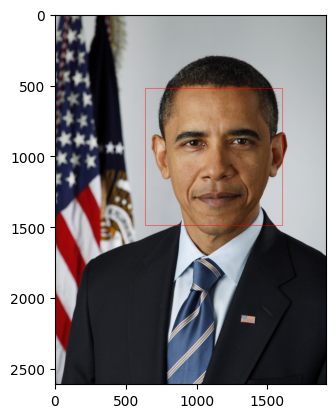

In [18]:
face_img = cv2.rectangle(img, (X, y), (X+width, y+height), (255, 0, 0), 2)
plt.imshow(face_img)

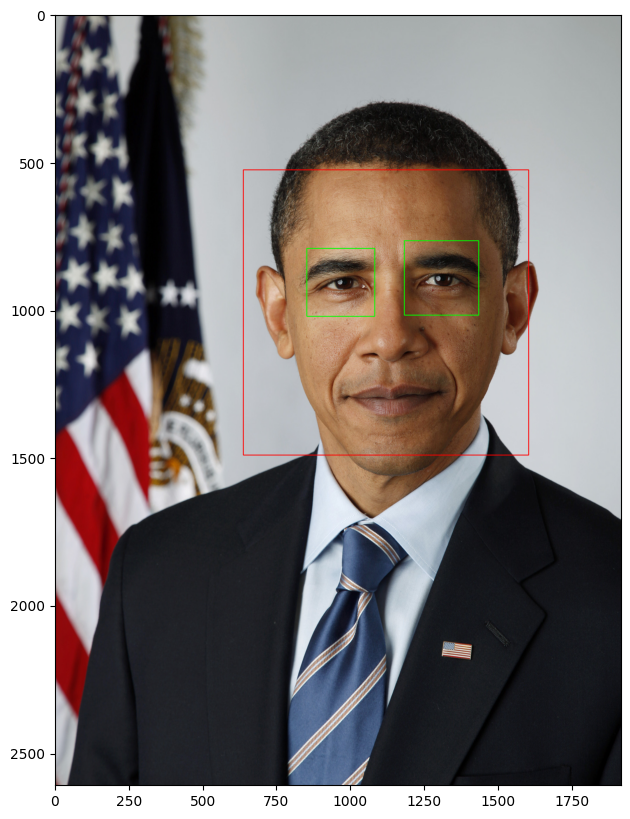

In [19]:
cv2.destroyAllWindows()

for x, y, w, h in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_img = img[y:y+h, x:x+w]
    roi_gray = cv2.cvtColor(roi_img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for ex, ey, ew, eh in eyes:
        cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(face_img, cmap='gray')
plt.show()

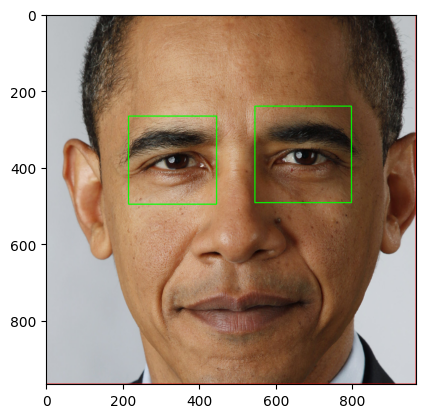

In [20]:
plt.imshow(roi_img, cmap='gray')

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

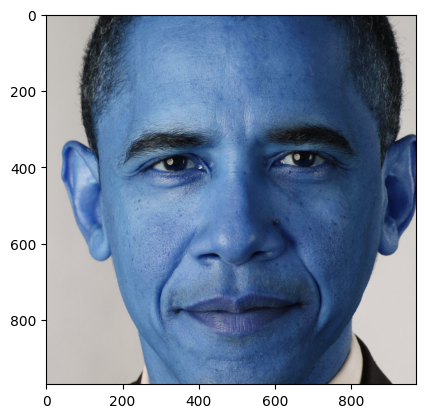

In [23]:
cropped_img = get_cropped_image_if_2_eyes(img_path)
plt.imshow(cropped_img)

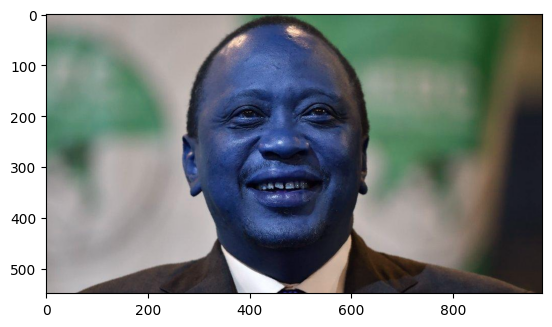

In [27]:
obs_img = cv2.imread("/content/data/Uhuru-kenyatte.jpg")
plt.imshow(obs_img)

In [28]:
crop_img_2 = get_cropped_image_if_2_eyes("/content/data/Uhuru-kenyatte.jpg")
crop_img_2